Background: Dogecoin is a memecoin because it was created as a joke but has attracted a lot of attention when it ranked top 10 with ~33B USD market cap

Context: In Dogecoin's perspective, how does Elon Musk tweeting about Dogecoin influence the Google search engagement and crypto market value

Hypotheses

1. Elon Musk tweeting about Dogecoin heavily impacts the cryto price
    - Analyze the reaction of Dogecoin price 10 mins after Elon Musk tweeted about it >> not significant
    - extend to 6 hrs becomes significant
2. Elon Musk tweeting about Dogecoin heavily impacts the Google search trends
    - Alanlyze possible delayed effect of Elon Musk's tweet on Dogecoin' Google search trends
    - 4 day lag shows significance

### Import Packages

In [2]:
import pandas as pd
import ccxt
from datetime import datetime,timedelta
import numpy as np
from pytrends.request import TrendReq
from dateutil import parser
import matplotlib.pyplot as plt 
import statsmodels.api as sm

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

### Read Dogecoin Tweets and Cyrpto Price to Merge

In [45]:
tweets_df = pd.read_csv('data/dogecoin_tweets.csv')
tweets_df['timestamp'] = pd.to_datetime(tweets_df['timestamp'])

dogecoin_price_df = pd.read_csv('data/price_clean.csv')

dogecoin_price_df['timestamp'] = pd.to_datetime(dogecoin_price_df['timestamp'], unit='ms')
dogecoin_price_df.sort_values(by='timestamp', inplace=True)
merge_df = pd.merge(left=dogecoin_price_df, right=tweets_df, how='left', on='timestamp')
print(merge_df)

               timestamp      open      high       low     close      volume  \
0    2020-12-20 08:30:00  0.003920  0.003930  0.003920  0.003922   1487104.0   
1    2020-12-20 08:31:00  0.003925  0.003925  0.003922  0.003922    181327.0   
2    2020-12-20 08:32:00  0.003922  0.003922  0.003922  0.003922         0.0   
3    2020-12-20 08:33:00  0.003922  0.003922  0.003922  0.003922         0.0   
4    2020-12-20 08:34:00  0.003922  0.003923  0.003922  0.003922    167833.0   
...                  ...       ...       ...       ...       ...         ...   
2539 2021-10-31 20:15:00  0.272900  0.273200  0.272400  0.273100   2291115.0   
2540 2021-10-31 20:16:00  0.273000  0.275000  0.273000  0.274900   5530698.0   
2541 2021-10-31 20:17:00  0.274900  0.277200  0.274800  0.277100   8364769.0   
2542 2021-10-31 20:18:00  0.277000  0.278000  0.276900  0.277200   8214591.0   
2543 2021-10-31 20:19:00  0.277200  0.279000  0.277100  0.278500  10318581.0   

     tweet_content  retweet_count  quot

In [4]:
# Proprocess the price data
# select the tweet_content col that is not null
twitter_index = merge_df[merge_df['tweet_content'].notnull()].index
merge_df.loc[twitter_index, 'tweet'] =True # If it is the time that Musk tweeted


# Calculate the change in price
merge_df['price_change'] = (merge_df['close']-merge_df['open'])/merge_df['open']



In [43]:
# Identify the timestamp with gaps
timestamp_gap_index = []
timestamp_col = merge_df["timestamp"]
for i, timestamp in enumerate(timestamp_col):
    if (i!=0) and abs(parser.parse(str(timestamp))-parser.parse(str(timestamp_col[i-1])))>timedelta(minutes=1):
            timestamp_gap_index.append(i)
merge_df.loc[timestamp_gap_index,'time_gap']=True
merge_df.loc[timestamp_gap_index,["price_change"]]=np.nan # Fill the gap with nan
timestamp_gap_index


[120,
 292,
 412,
 532,
 652,
 772,
 892,
 1012,
 1132,
 1263,
 1383,
 1503,
 1623,
 1743,
 1863,
 1983,
 2103,
 2263,
 2424]

In [42]:
for i, timestamp in enumerate(timestamp_col):
    print(i,timestamp)

0 2020-12-20 08:30:00
1 2020-12-20 08:31:00
2 2020-12-20 08:32:00
3 2020-12-20 08:33:00
4 2020-12-20 08:34:00
5 2020-12-20 08:35:00
6 2020-12-20 08:36:00
7 2020-12-20 08:37:00
8 2020-12-20 08:38:00
9 2020-12-20 08:39:00
10 2020-12-20 08:40:00
11 2020-12-20 08:41:00
12 2020-12-20 08:42:00
13 2020-12-20 08:43:00
14 2020-12-20 08:44:00
15 2020-12-20 08:45:00
16 2020-12-20 08:46:00
17 2020-12-20 08:47:00
18 2020-12-20 08:48:00
19 2020-12-20 08:49:00
20 2020-12-20 08:50:00
21 2020-12-20 08:51:00
22 2020-12-20 08:52:00
23 2020-12-20 08:53:00
24 2020-12-20 08:54:00
25 2020-12-20 08:55:00
26 2020-12-20 08:56:00
27 2020-12-20 08:57:00
28 2020-12-20 08:58:00
29 2020-12-20 08:59:00
30 2020-12-20 09:00:00
31 2020-12-20 09:01:00
32 2020-12-20 09:02:00
33 2020-12-20 09:03:00
34 2020-12-20 09:04:00
35 2020-12-20 09:05:00
36 2020-12-20 09:06:00
37 2020-12-20 09:07:00
38 2020-12-20 09:08:00
39 2020-12-20 09:09:00
40 2020-12-20 09:10:00
41 2020-12-20 09:11:00
42 2020-12-20 09:12:00
43 2020-12-20 09:13:0

In [6]:
# add diffence date 
merge_df.head(100)

,timestamp,open,high,low,close,volume,tweet_content,retweet_count,quote_count,like_count,tweet,price_change,time_gap
0,2020-12-20 08:30:00,0.003920,0.003930,0.003920,0.003922,1487104.0,NaN,NaN,NaN,NaN,NaN,0.000485,NaN
1,2020-12-20 08:31:00,0.003925,0.003925,0.003922,0.003922,181327.0,NaN,NaN,NaN,NaN,NaN,-0.000713,NaN
2,2020-12-20 08:32:00,0.003922,0.003922,0.003922,0.003922,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
3,2020-12-20 08:33:00,0.003922,0.003922,0.003922,0.003922,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
4,2020-12-20 08:34:00,0.003922,0.003923,0.003922,0.003922,167833.0,NaN,NaN,NaN,NaN,NaN,0.000051,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-12-20 10:05:00,0.004711,0.004711,0.004592,0.004593,112178883.0,NaN,NaN,NaN,NaN,NaN,-0.025174,NaN
96,2020-12-20 10:06:00,0.004604,0.004657,0.004577,0.004597,55872722.0,NaN,NaN,NaN,NaN,NaN,-0.001521,NaN
97,2020-12-20 10:07:00,0.004597,0.004650,0.004582,0.004646,39345047.0,NaN,NaN,NaN,NaN,NaN,0.010725,NaN
98,2020-12-20 10:08:00,0.004640,0.004650,0.004612,0.004623,33362436.0,NaN,NaN,NaN,NaN,NaN,-0.003728,NaN


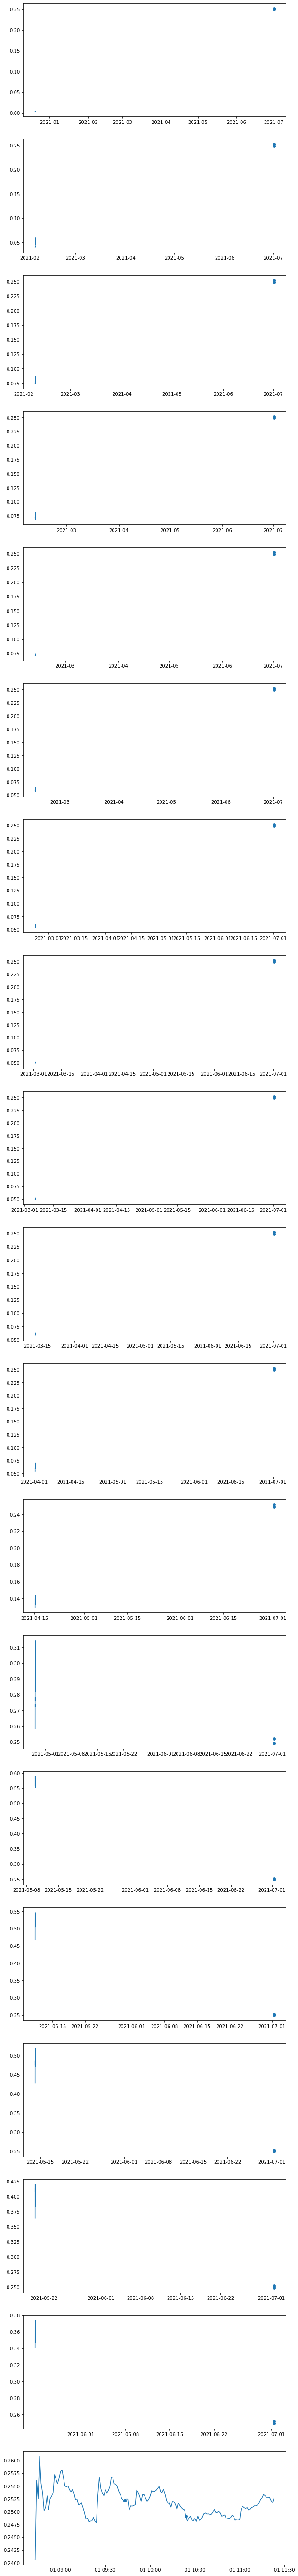

In [38]:
# Select the index between two time_gap which before the tweet time
price_change_before_twitter_list = []
price_change_after_twitter_list = []
volume_before_twitter_list = []
volume_after_twitter_list = []
volatility_before_twitter_list = []
volatility_after_twitter_list = []
plt.figure(figsize=(10,100))
names = locals()
for count,index in enumerate(timestamp_gap_index):
    if count!=0:
        dfm_temp = merge_df.loc[timestamp_gap_index[count-1]:index-1]
    else:
        dfm_temp = merge_df.loc[0:index-1]
    # Analysis
    # Find the first tweet index 
    first_tweet_index = dfm_temp[dfm_temp['tweet']==True].index[0]
    # Find the last tweet index
    last_tweet_index = dfm_temp[dfm_temp['tweet']==True].index[-1]
    # Find the first price change before the first tweet
    price_change_before_twitter = list(dfm_temp.loc[dfm_temp.index[0]:first_tweet_index]['price_change'])
    price_change_before_twitter_list.extend(price_change_before_twitter)
    # Find the last price change after the last tweet
    price_change_after_twitter = list(dfm_temp.loc[last_tweet_index:]['price_change'])
    price_change_after_twitter_list.extend(price_change_after_twitter)
    # Find the first volume before the first tweet
    volume_before_twitter_list.extend(list(dfm_temp.loc[dfm_temp.index[0]:first_tweet_index]['volume']))
    # Find the last volume after the last tweet
    volume_after_twitter_list.extend(list(dfm_temp.loc[last_tweet_index:]['volume']))
    # Find the first volatility before the first tweet
    volatility_before_twitter_list.append(dfm_temp.loc[dfm_temp.index[0]:first_tweet_index]['price_change'].std())
    # Find the last volatility after the last tweet
    volatility_after_twitter_list.append(dfm_temp.loc[last_tweet_index:]['price_change'].std()) 
    # draw the price change data
    names[f"ax{count}"] = plt.subplot(len(timestamp_gap_index),1,count+1)
    names[f"ax{count}"].plot(dfm_temp["timestamp"],dfm_temp["open"])
    dfm_tweets_temp = dfm_temp[dfm_temp["tweet_content"].notna()]
    names[f"ax{count}"].scatter(dfm_tweets["timestamp"],dfm_tweets["open"])
    

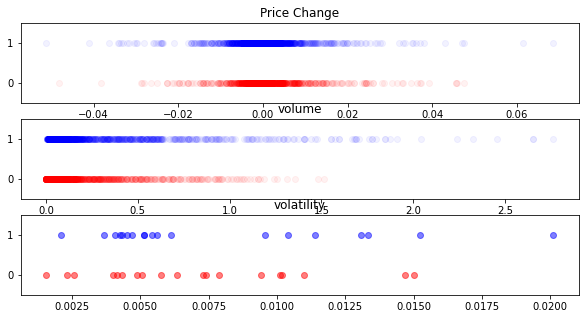

In [8]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

# draw the scatter plot of price change
ax1.set_title('Price Change')
ax1.set_ylim(-0.5,1.5,1)
ax1.scatter(price_change_before_twitter_list, [0]*len(price_change_before_twitter_list), marker='o', color='r', alpha=0.05)
ax1.scatter(price_change_after_twitter_list, [1]*len(price_change_after_twitter_list), marker='o', color='b', alpha=0.05)

ax2.set_title('volume')
ax2.set_ylim(-0.5,1.5,1)
ax2.scatter(volume_before_twitter_list, [0]*len(volume_before_twitter_list), marker='o', color='r', alpha=0.05)
ax2.scatter(volume_after_twitter_list, [1]*len(volume_after_twitter_list), marker='o', color='b', alpha=0.05)

ax3.set_title('volatility')
ax3.set_ylim(-0.5,1.5,1)
ax3.scatter(volatility_before_twitter_list, [0]*len(volatility_before_twitter_list), marker='o', color='r', alpha=0.5)
ax3.scatter(volatility_after_twitter_list, [1]*len(volatility_after_twitter_list), marker='o', color='b', alpha=0.5)


In [9]:
# Hypothesis:
# There is a significant change between the price change before and after the tweet
# There is a significant change between the volume before and after the tweet
# There is a significant change between the volatility before and after the tweet


# X =np.array([0]*len(price_change_before_twitter_list)+[1]*len(price_change_after_twitter_list)).astype("int")
# Y = np.array(price_change_before_twitter_list+price_change_after_twitter_list).astype('float64')
# dfm_price_change = pd.DataFrame({'X':X, 'Y':Y})
# dfm_price_change.dropna(inplace=True)
# X = dfm_price_change["X"]
# Y = dfm_price_change["Y"]
# # print(X,Y)
# X = sm.add_constant(X)
# lm = sm.OLS(Y,X).fit()
# print (lm.summary()) 

X=np.array([0]*len(volume_before_twitter_list)+[1]*len(volume_after_twitter_list)).astype("int")
Y = np.array(volume_before_twitter_list+volume_after_twitter_list).astype('float64')
dfm_volume = pd.DataFrame({'X':X, 'Y':Y})
dfm_volume.dropna(inplace=True)
X = dfm_volume["X"]
Y = dfm_volume["Y"]
# print(X,Y)
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print (lm.summary())

# X=np.array([0]*len(volatility_before_twitter_list)+[1]*len(volatility_after_twitter_list)).astype("int")
# Y = np.array(volatility_before_twitter_list+volatility_after_twitter_list).astype('float64')
# dfm_volatility = pd.DataFrame({'X':X, 'Y':Y})
# dfm_volatility.dropna(inplace=True)
# X = dfm_volatility["X"]
# Y = dfm_volatility["Y"]
# # print(X,Y)
# X = sm.add_constant(X)
# lm = sm.OLS(Y,X).fit()
# print (lm.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     61.48
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           6.80e-15
Time:                        19:28:07   Log-Likelihood:                -43018.
No. Observations:                2299   AIC:                         8.604e+04
Df Residuals:                    2297   BIC:                         8.605e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.819e+07   9.51e+05     19.129      0.0

# Google trends

In [10]:
pytrend = TrendReq()
pytrend.build_payload(kw_list = ["doge"],timeframe='2020-12-01 2021-07-31')
trends = pytrend.interest_over_time()
trendsdf_part1 = pd.DataFrame(data = {'date': trends.index.tolist(),
                                'search': trends["doge"].tolist()})
pytrend.build_payload(kw_list = ["doge"],timeframe='2021-08-01 2021-12-31')
trends = pytrend.interest_over_time()
trendsdf_part2 = pd.DataFrame(data = {'date': trends.index.tolist(),
                                'search': trends["doge"].tolist()})
trendsdf = trendsdf_part1.append(trendsdf_part2)
trendsdf['date'] = pd.to_datetime(trendsdf['date']).dt.date
tweets_df["timestamp"] = pd.to_datetime(tweets_df["timestamp"]).dt.date
merged_dfm = pd.merge(left=tweets_df, right=trendsdf, how='right', left_on='timestamp',right_on='date')
merged_dfm.sort_values(by='date', inplace=True)


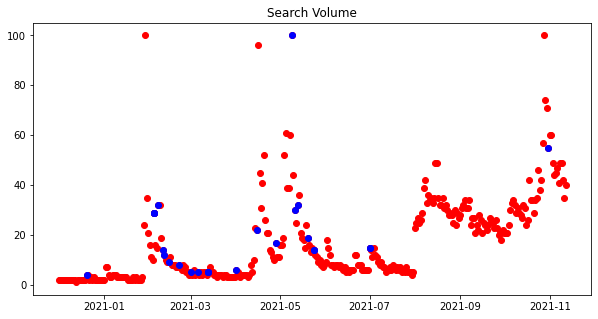

In [11]:
# plt search scatter 
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Search Volume')
plt.scatter(merged_dfm["date"],merged_dfm["search"], marker='o', color='r')
plt.scatter(merged_dfm.dropna()["date"],merged_dfm.dropna()["search"], marker='o', color='b')

In [12]:
# Hypothesis:
# There is a significant change between the search change with or without the tweet
merged_dfm
merged_dfm["with_tweet"] = merged_dfm["tweet_content"].isna()
merged_dfm["with_tweet"] = merged_dfm["with_tweet"].apply(lambda x: 0 if x else 1)

X = merged_dfm["with_tweet"]
Y = merged_dfm["search"]
# print(X,Y)
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print (lm.summary())


                            OLS Regression Results                            
Dep. Variable:                 search   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7850
Date:                Sun, 14 Nov 2021   Prob (F-statistic):              0.376
Time:                        19:28:09   Log-Likelihood:                -1503.2
No. Observations:                 353   AIC:                             3010.
Df Residuals:                     351   BIC:                             3018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2875      0.949     18.222      0.0

In [13]:
merged_dfm["latest_date_of_tweets"] = merged_dfm["timestamp"].fillna(method="ffill")
merged_dfm["latest_tweets_retweet_count"] = merged_dfm["retweet_count"].fillna(method="ffill")
merged_dfm["latest_tweets_quote_count"] = merged_dfm["quote_count"].fillna(method="ffill") 
merged_dfm["latest_tweets_like_count"] = merged_dfm["like_count"].fillna(method="ffill")

merged_dfm.dropna(subset=["latest_tweets_like_count"], inplace=True)
# merged_dfm

In [14]:
merged_dfm
day_lag = 3
merged_dfm[f"in_{day_lag}_days"] = merged_dfm["diff_dates"].apply(lambda x:0 if x>timedelta(day_lag) else 1)
X = merged_dfm[f"in_{day_lag}_days"]# 'latest_tweets_quote_count','latest_tweets_like_count']]
Y = merged_dfm["search"]
# print(X,Y)f"in_{day_lag}_days"
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print (lm.summary())

KeyError: 'diff_dates'

In [33]:
dfm_temp["open"]

2263    0.24067
2264    0.25611
2265    0.25253
2266    0.26080
2267    0.25553
         ...   
2419    0.25280
2420    0.25279
2421    0.25219
2422    0.25179
2423    0.25268
Name: open, Length: 161, dtype: float64

In [20]:
dfm_temp

,timestamp,open,high,low,close,volume,tweet_content,retweet_count,quote_count,like_count,tweet,price_change,time_gap
2263,2021-07-01 08:43:00,0.24067,0.25800,0.24012,0.25611,60313750.5,NaN,NaN,NaN,NaN,NaN,NaN,True
2264,2021-07-01 08:44:00,0.25611,0.25964,0.25149,0.25279,37770026.0,NaN,NaN,NaN,NaN,NaN,-0.012963,NaN
2265,2021-07-01 08:45:00,0.25253,0.26100,0.25003,0.26081,57190532.5,NaN,NaN,NaN,NaN,NaN,0.032788,NaN
2266,2021-07-01 08:46:00,0.26080,0.26100,0.25486,0.25561,36662813.2,NaN,NaN,NaN,NaN,NaN,-0.019900,NaN
2267,2021-07-01 08:47:00,0.25553,0.25772,0.25247,0.25368,22796554.6,NaN,NaN,NaN,NaN,NaN,-0.007240,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,2021-07-01 11:19:00,0.25280,0.25300,0.25245,0.25280,1241245.7,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2420,2021-07-01 11:20:00,0.25279,0.25290,0.25200,0.25224,989769.4,NaN,NaN,NaN,NaN,NaN,-0.002176,NaN
2421,2021-07-01 11:21:00,0.25219,0.25229,0.25165,0.25181,1075641.8,NaN,NaN,NaN,NaN,NaN,-0.001507,NaN
2422,2021-07-01 11:22:00,0.25179,0.25311,0.25178,0.25268,1881996.7,NaN,NaN,NaN,NaN,NaN,0.003535,NaN
